<center>
    <img style="float: left;" src="Mix_colour.png" width="200"></img>
</center>

<br/><br/>
<br/><br/>

# Feature Scaling

In this assignment you will use the breast cancer dataset to predict cancer using the $k$-nearest neighbour algorithm ([KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)), showing the importance of feature scaling. You also will learn how to check out why feature scaling is important to speed up gradient descent (used in e.g. logistic regression).

## Data

We start from importing some useful packages and loading the dataset. Recall, that you have worked with this dataset in the earlier assignment. Here the target is the label, where 0 means malign and 1 - benign tumors. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(33)  # setting the random seed makes the example reproducible

df_breast_cancer = pd.read_csv('/home/jovyan/Data/breast_cancer.csv')

In [6]:
pd.set_option('display.max_columns', None) # let's you see all the columns
df_breast_cancer.head(3) # check out the dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In order to see that this dataset does contain data which vary in "size", one can check the means of each column.

In [3]:
df_breast_cancer.mean() 

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

We can also look at the distribution of the different features in box plots. Notice that the values are in logscale to make the comparison easier. 

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:3949: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


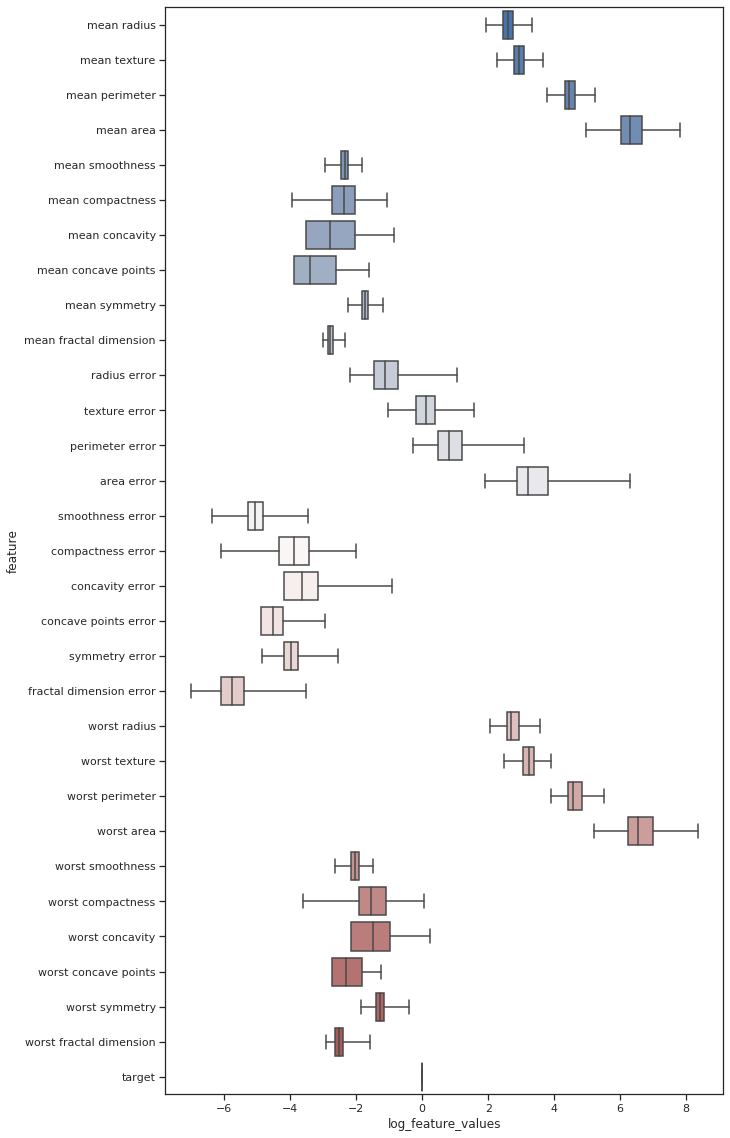

In [4]:
import warnings
import seaborn as sns

all_feature_values = []
features_names = []

n = len(df_breast_cancer)

for feature in df_breast_cancer.columns:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        feat_values = np.log(df_breast_cancer[feature].values)
        all_feature_values = np.concatenate((all_feature_values,feat_values))
        features_names = np.concatenate((features_names,[feature]*n))

box_plot_df = pd.DataFrame({'log_feature_values':all_feature_values,'feature':features_names})

sns.set(style="ticks")
f, ax = plt.subplots(figsize=(10, 20))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="log_feature_values", y="feature", data=box_plot_df,
            whis="range", palette="vlag")

Indeed, we see on the plot above, that the scale is very different for the various features. 

### Q1:

Let's prepare the data for the further modelling. Split the dataset into train and test sets using all features (excluding the target column).
Use `test_size`=0.3 and `random_state`=30.

**Hint:** 

* import the necessary module from scikit-learn
* select the feature colums and the target variable
* create the variables `X_train`, `y_train`, `X_test` and `y_test` for the training and testing the future model

In [8]:
# (approx. 4 lines of code)
### START ANSWER HERE ###
from sklearn.model_selection import train_test_split
X = df_breast_cancer.iloc[:,:-1]
y = df_breast_cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
### END ANSWER HERE ###

In [9]:
print('X_train.iloc[0,0] = ', X_train.iloc[0,0], '\t X_train.iloc[-1,-1] = ', X_train.iloc[-1,-1])
print('X_train.shape = ', X_train.shape, '\t y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape, '\t y_test.shape = ', y_test.shape)

X_train.iloc[0,0] =  13.61 	 X_train.iloc[-1,-1] =  0.09208
X_train.shape =  (398, 30) 	 y_train.shape =  (398,)
X_test.shape =  (171, 30) 	 y_test.shape =  (171,)


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> X_train.iloc[0,0]</td> 
        <td> 13.61 </td> 
        <td> X_train.iloc[-1,-1]</td> 
        <td> 0.09208 </td> 
    </tr>
    <tr> 
        <td> X_train.shape</td> 
        <td> (398, 30) </td> 
        <td> y_train.shape</td> 
        <td> (398, ) </td> 
    </tr>
    <tr> 
        <td> X_test.shape</td> 
        <td> (171, 30) </td> 
        <td> y_test.shape</td> 
        <td> (171, ) </td> 
    </tr>
</table> 

In [ ]:
# nbgrader cell


## Feature Scaling and KNN 

Recall, that algorithm $k$-nearest neighbour (KNN) for classification is a supervised algorithm, such that for a "new" data point, it checks the labels of the $k$ nearest data points with regards to a distance metric (often Euclidean distance), and assigns to the new point the label of which there is a majority of the $k$ nearest points.

### KNN without scaling

Let's first take a look at a KNN model without scaling the features. We are using KNN model that checks 50 nearest neighbours.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=50) 
knn.fit(X_train,y_train)
report = classification_report(y_test,knn.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.98      0.79      0.87        62
           1       0.89      0.99      0.94       109

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.92      0.92      0.92       171



### KNN with scaling

Now let's scale the features before fitting KNN model. 

First we import the StandardScaler and use it to scale the features. 

Important to remember, that in the interest of preventing the information about the distribution of the test set leaking into your model, you should fit the scaler **on your training data only**, then standardise both training and test sets with that scaler. 

**Remember, by fitting the scaler on the full dataset prior to splitting, information about the test set is used to transform the training set, which in turn is passed downstream.** 

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)
report = classification_report(y_test,knn.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        62
           1       0.94      1.00      0.97       109

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171



### Q2:

As you can see the scaled version does a bit better. Which of the below statements are correct?

1. The scaled version of knn should not be better, something is wrong!
2. The scaled version of knn does better because sklearns version of knn uses Euclidean distance as a default and so in the unscaled case it penalize the large values.
3. Scaling the features should always give better results in any machine learning algorithm!
4. The scaled version of knn does better because sklearns version of knn uses Euclidean distance as a default and so in the unscaled case it penalize the small values.

In [12]:
# Fill in the number corresponding to your answer inside the brackets: Q2_answer = [5]

### START ANSWER HERE ###
Q2_answer = [2]
### END ANSWER HERE ###

In [13]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(Q2_answer) == 'beb4dbf9af069aa2df7b147229965085':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader cell


## Feature Scaling and gradient descent

Something that scaling can have an impact on is how fast gradient descent converges. To demonstrate an example we will, in what follows, do contour plots of two paraboloid surfaces, one circular and one elliptic, to see that in the elliptic case (which should represent an unscaled model), gradient descent can have a bit of trouble converging. Note that here we do not start with a regression model but only check out the gradient descent of a surface. Then we will also see this in practice in logistic regression.

**Important note!**

In the cells below you will see ### START CODE HERE ### and ### END CODE HERE ### flags. These are dummies that are made in order to allow you to make changes in these cells (see the question Q3 below). Don't worry about these flags.

In [14]:
# Import packages to do 3D-plots
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

# Define a function of a (circular) paraboloid surface
def func_z_circ(x,y):
    z = x**2+y**2
    return z

# Define a function to calculate the gradient descent of the paraboloid surface
def gradient_descent_func_z_circ(previous_x, previous_y, learning_rate, steps):
    x_gd = []
    y_gd = []
    z_gd = []

    x_gd.append(previous_x)
    y_gd.append(previous_y)
    z_gd.append(func_z_circ(previous_x, previous_y))

    # begin the loops to update x, y and z
    for i in range(steps):
        current_x = previous_x - learning_rate*(2*previous_x)
        x_gd.append(current_x)
        current_y = previous_y - learning_rate*(2*previous_y)
        y_gd.append(current_y)

        z_gd.append(func_z_circ(current_x, current_y))

        # update previous_x and previous_y
        previous_x = current_x
        previous_y = current_y

    return x_gd, y_gd, z_gd

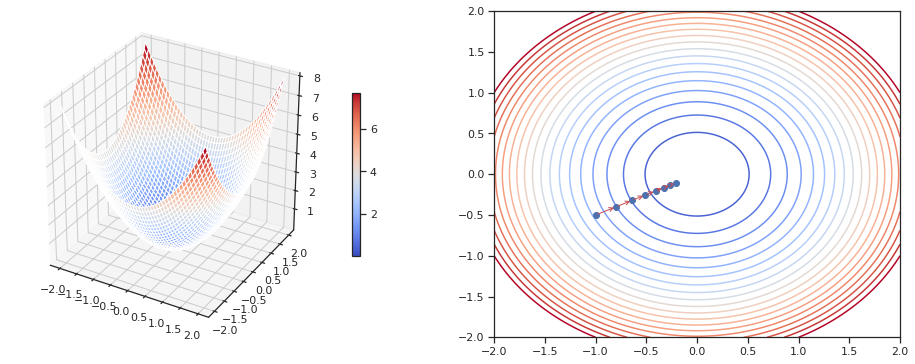

In [15]:
### START ANSWER HERE ###
### END ANSWER HERE ###

# To plot func_z_circ

n = 300
x = np.linspace(-2,2,n)
y = np.linspace(-2,2,n)

xx,yy = np.meshgrid(x,y)


# The figure object
fig = plt.figure(figsize=(16,6))


# The first plot is a surface plot of the function func_z_circ
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(xx,yy,func_z_circ(xx,yy),cmap=cm.coolwarm)
fig.colorbar(surf,shrink=0.5)


# The second plot is a contour plot of func_z_circ to which
# we will add the gradient descent steps
ax2 = fig.add_subplot(1, 2, 2)
cset = ax2.contour(x,y,func_z_circ(xx,yy), levels = np.linspace(0,5,20), cmap=cm.coolwarm)

# Set initial values for where to start the gradient descent, incl step size (learning_rate) and number of steps
x0 = -1
y0 = -0.5
learning_rate = 0.1
steps = 7

# Do the gradient descent algorithm
x_gd, y_gd, z_gd = gradient_descent_func_z_circ(x0, y0, learning_rate, steps)

# Add to the second plot
ax2.plot(x_gd, y_gd, 'bo')
for i in range(1, steps+1):
    ax2.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1}
                )

In [16]:
# Define a function of an elliptic paraboloid surface
def func_z_ellip(x,y):
    z = x**2+10*y**2
    return z

# Define a function to calculate the gradient descent of the elliptic paraboloid surface function

def gradient_descent_func_z_ellip(previous_x, previous_y, learning_rate, steps):
    x_gd = []
    y_gd = []
    z_gd = []

    x_gd.append(previous_x)
    y_gd.append(previous_y)
    z_gd.append(func_z_ellip(previous_x, previous_y))

    # begin the loops to update x, y and z
    for i in range(steps):
        current_x = previous_x - learning_rate*(2*previous_x)
        x_gd.append(current_x)
        current_y = previous_y - learning_rate*(10*2*previous_y)
        y_gd.append(current_y)

        z_gd.append(func_z_ellip(current_x, current_y))

        # update previous_x and previous_y
        previous_x = current_x
        previous_y = current_y

    return x_gd, y_gd, z_gd

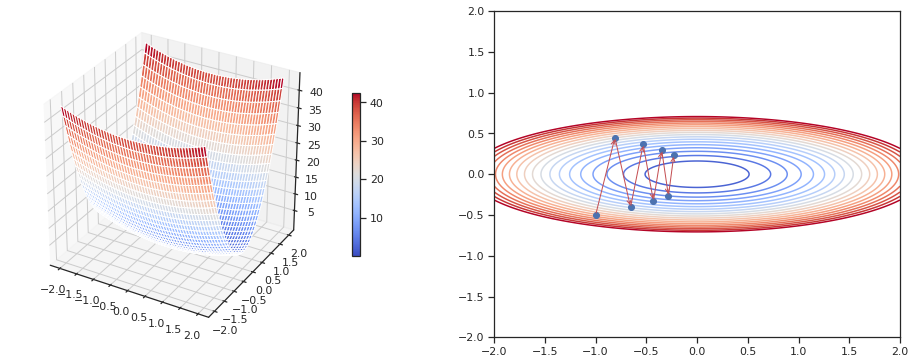

In [17]:
### START ANSWER HERE ###
### END ANSWER HERE ###

# To plot func_z_ellip
n = 300
x = np.linspace(-2,2,n)
y = np.linspace(-2,2,n)

xx,yy = np.meshgrid(x,y)


# The figure object
fig = plt.figure(figsize=(16,6))


# The first plot is a surface plot of the function func_z_ellip
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(xx,yy,func_z_ellip(xx,yy),cmap=cm.coolwarm)
fig.colorbar(surf,shrink=0.5)


# The second plot is a contour plot of func_z_ellip to which
# we will add the gradient descent steps
ax2 = fig.add_subplot(1, 2, 2)
cset = ax2.contour(x,y,func_z_ellip(xx,yy), levels = np.linspace(0,5,20), cmap=cm.coolwarm)

# Set initial values for where to start the gradient descent, incl step size (learning_rate) and number of steps
x0 = -1
y0 = -0.5
learning_rate = 0.095
steps = 7

# Do the gradient descent algorithm
x_gd, y_gd, z_gd = gradient_descent_func_z_ellip(x0, y0, learning_rate, steps)

# Add to the second plot
ax2.plot(x_gd, y_gd, 'bo')
for i in range(1, steps+1):
    ax2.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1}
                )

### Q3:

Play with the step size, initial point and number of steps of the gradient descent for circular and elliptic cases in the cells above. Does they both always converge? Choose the correct answer below.

**Hint**: check what happens for large values of the `learning_rate`.

1. They will both always converge
2. The circular one will always converge while the elliptic one will not always converge
3. There are step sizes and initial points for each case such that the gradient descent will not converge
4. The elliptic one will always converge while the circular one will not always converge

In [18]:
# Fill in your answer in the form of a list of numbers: Q3_answer = [5]

### START ANSWER HERE ###
Q3_answer = [3]
### END ANSWER HERE ###

In [19]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(Q3_answer) == 'f2577a6fc29b900fe7d4c6321346be48':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader cell


To show how it works in practice, let's check logistic regression for the cancer dataset.

Note that we deliberately set the number of steps (`max_iter`) to be really small to prove a point. For good enough examples one would not see a huge difference when the number of steps increases however it is good to know that there are cases when the gradient descent is much slower without feature scaling.

**Important note!**

In the cells below you will see ### START CODE HERE ### and ### END CODE HERE ### flags. These are dummies that are made in order to allow you to make changes in these cells (see the question Q4 below). Don't worry about these flags.

First let's try logistic regression model without scaling the features and for a few number of steps (note `max_iter=3`).

In [20]:
### START ANSWER HERE ###
### END ANSWER HERE ###

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df_breast_cancer.iloc[:,:-1]
y = df_breast_cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

logistic_regression = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=3)
logistic_regression.fit(X_train,y_train)
print(classification_report(y_test,logistic_regression.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54        62
           1       0.74      1.00      0.85       109

    accuracy                           0.77       171
   macro avg       0.87      0.69      0.69       171
weighted avg       0.83      0.77      0.74       171



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Now let's use `StandardScaler()` and `max_iter=3`.

In [21]:
### START ANSWER HERE ###
### END ANSWER HERE ###

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logistic_regression = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=3) #note max_iter=3!
logistic_regression.fit(X_train,y_train)
print(classification_report(y_test,logistic_regression.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        62
           1       0.96      0.99      0.98       109

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Q4 (optional):

As you can see the scaled version does much better with this small amount of steps. Feel free to play around with `max_iter` to see what happens to the classification report.

# Good Job!